These are examples of how to use the MultiNeuronModule for a general simulation of modules that involve many neurons

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import simulation_module as sim

%matplotlib inline

## Two-neuron simulation

I simulate my original two-neuron modules using the new MultiNeuronModule.

There are a bunch of tests I did to make sure they are equivalent

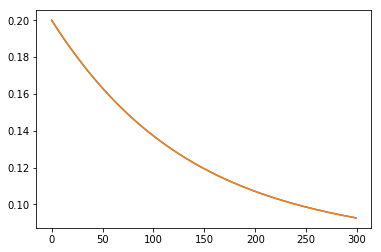

In [2]:
# Test 1: equivalence of two-neurons and Multi-neurons
# The two lines should overlap
module1 = sim.TwoNeuronModule(Wut=6, Wuv=6, Wvt=6, Wvu=6, theta=0.613, tau=100, dt=0.5, 
                         sigma_mu=0.0, sigma_sigma=0.0, threshold=0.65, K=0)

Winh = np.matrix([[0, -6], [-6, 0]])
Wexc = np.matrix([[0, 0], [0, 0]])
module2 = sim.MultiNeuronModule(Winh=Winh, Wexc=Wexc, theta=0.613, tau=100, dt=0.5, 
                         sigma_mu=0.0, sigma_sigma=0.0, threshold=0.65, K=0)

u1, v1 = module1.simulate_full_trial(0.7, 0.2, 1, 300, True, 0.1)
u2 = module2.simulate_full_trial((0.7, 0.2), 1, 300, True, 0.6)
u2 = np.squeeze(u2)

plt.plot(v1)
plt.plot(u2[1,:])


In [3]:
uarr8, varr8 = module1.simulate_full_trial(0.7, 0.2, 2, 3000, True, 0.8)
uarr7, varr7 = module1.simulate_full_trial(0.7, 0.2, 2, 3000, True, 0.7)
uarr6, varr6 = module1.simulate_full_trial(0.7, 0.2, 2, 3000, True, 0.6)
uarr5, varr5 = module1.simulate_full_trial(0.7, 0.2, 2, 3000, True, 0.5)
uarr4, varr4 = module1.simulate_full_trial(0.7, 0.2, 2, 3000, True, 0.4)
uarr3, varr3 = module1.simulate_full_trial(0.7, 0.2, 2, 3000, True, 0.3)
uarr2, varr2 = module1.simulate_full_trial(0.7, 0.2, 2, 3000, True, 0.2)
uarr1, varr1 = module1.simulate_full_trial(0.7, 0.2, 2, 3000, True, 0.1)

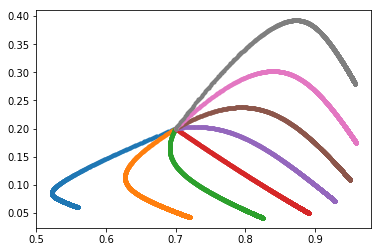

In [4]:
plt.plot(uarr1[:,0], varr1[:,0], '.')
plt.plot(uarr2[:,0], varr2[:,0], '.')
plt.plot(uarr3[:,0], varr3[:,0], '.')
plt.plot(uarr4[:,0], varr4[:,0], '.')
plt.plot(uarr5[:,0], varr5[:,0], '.')
plt.plot(uarr6[:,0], varr6[:,0], '.')
plt.plot(uarr7[:,0], varr7[:,0], '.')
plt.plot(uarr8[:,0], varr8[:,0], '.')

In [5]:
# Test 2: simulation of multi-neuron module
# Should see spider-like trajectories

u8 = module2.simulate_full_trial((0.7, 0.2), 2, 3000, True, 6 * 0.8)
u7 = module2.simulate_full_trial((0.7, 0.2), 2, 3000, True, 6 * 0.7)
u6 = module2.simulate_full_trial((0.7, 0.2), 2, 3000, True, 6 *0.6)
u5 = module2.simulate_full_trial((0.7, 0.2), 2, 3000, True, 6 *0.5)
u4 = module2.simulate_full_trial((0.7, 0.2), 2, 3000, True, 6 *0.4)
u3 = module2.simulate_full_trial((0.7, 0.2), 2, 3000, True, 6 *0.3)
u2 = module2.simulate_full_trial((0.7, 0.2), 2, 3000, True, 6 *0.2)
u1 = module2.simulate_full_trial((0.7, 0.2), 2, 3000, True, 6 *0.1)

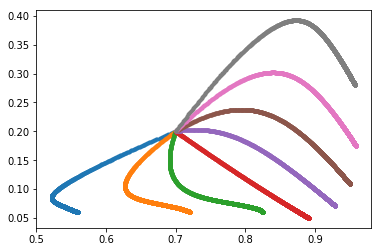

In [6]:
plt.plot(u1[0,0,:], u1[1,0,:], '.')
plt.plot(u2[0,0,:], u1[1,0,:], '.')
plt.plot(u3[0,0,:], u1[1,0,:], '.')
plt.plot(u4[0,0,:], u4[1,0,:], '.')
plt.plot(u5[0,0,:], u5[1,0,:], '.')
plt.plot(u6[0,0,:], u6[1,0,:], '.')
plt.plot(u7[0,0,:], u7[1,0,:], '.')
plt.plot(u8[0,0,:], u8[1,0,:], '.')

#TODO: Compare between these trajectories and two-neuron trajectories

201.56


(array([  7.,  10.,  23.,  22.,  19.,   6.,   8.,   2.,   1.,   2.]),
 array([ 164. ,  174.3,  184.6,  194.9,  205.2,  215.5,  225.8,  236.1,
         246.4,  256.7,  267. ]),
 <a list of 10 Patch objects>)

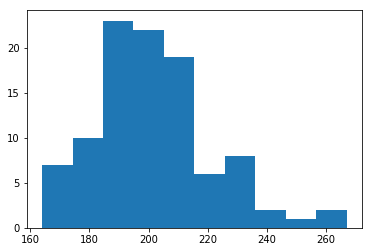

In [7]:
# Test 3: find tp for a single module
# The two plots should look similar, and mean tp should be the same
module = sim.MultiNeuronModule(Winh=Winh, Wexc=Wexc, theta=6*0.613, tau=100, dt=1, 
                         sigma_mu=0.1, sigma_sigma=0.5, threshold=0.65, K=0)
u = module.simulate_full_trial((0.7, 0.2), 100, 1000)
times = module.find_tp()

#plt.plot(u[0,:,:].T, u[1,:,:].T,'b', alpha=0.1);
#TODO: Implement find_tp function
print(np.mean(times))
plt.hist(times)


201.0


(array([  8.,  17.,  18.,  24.,  14.,   7.,   5.,   3.,   3.,   1.]),
 array([ 161. ,  172.6,  184.2,  195.8,  207.4,  219. ,  230.6,  242.2,
         253.8,  265.4,  277. ]),
 <a list of 10 Patch objects>)

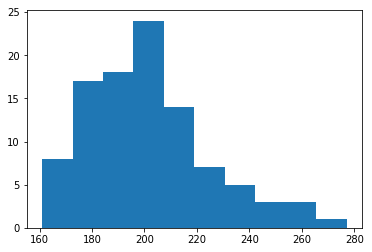

In [8]:
module = sim.TwoNeuronModule(Wut=6, Wuv=6, Wvt=6, Wvu=6, theta=0.613, tau=100, dt=1, 
                         sigma_mu=0.1, sigma_sigma=0.5, threshold=0.65, K=0)
a, b = module.simulate_full_trial(0.7, 0.2, 100, 1000)
times = module.find_tp()

#plt.plot(a,b,'b', alpha=0.1);
print(np.mean(times))
plt.hist(times)

## Testing MultiNeuron Module on circular ring simulation

In [9]:
# Common parameters used for the entire file
epsi = 0.01
x0 = np.matrix('0.8; 0.2; 0.2; 0.2')
init_state = [0.8, 0.2, 0.2, 0.2] #Same as x0 but put into an array
I0 = 0.5

WinhChain = np.matrix('0 -1 -0.5 -1; -1 0 -1 -0.5; -0.5 -1 0 -1; -1 -0.5 -1 0')*10
WexcChain = np.matrix('0  0 0 1.5; 1.5 0 0 0; 0 1.5 0 0; 0 0 1.5 0')*10
tau = 500
dt = 1


In [10]:
# To initialize a MultiNeuronModule, follow the syntax below and give the required parameters
# (see documentation in simulation_module for further info)
# theta is the common input
# sigma_mu and sigma_sigma will be used for noise addition later on (feel free to explore this yourself)
# threshold and K are mostly used for my two-neuron module - we'll have to discuss how to 
# change these to fit Multi neurons
chain = sim.MultiNeuronModule(Winh=WinhChain, Wexc=WexcChain, theta=I0, tau=tau, dt=dt, 
                         sigma_mu=0.0, sigma_sigma=0.0, threshold=0.65, K=0)

# To start the simulation, define the init_state (an array of initial values for each neuron)
# Give the number of trials and number of timesteps
u = chain.simulate_full_trial(init_state, 1, 6000)

The variable returned, `u` has dimension n_neurons $\times$ ntrials $\times$ nsteps

In [11]:
u.shape

(4, 1, 6000)

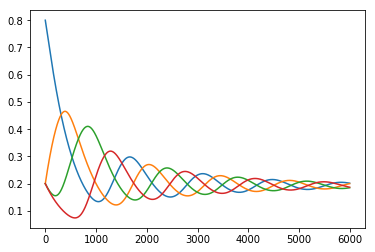

In [12]:
# For plotting, simply extract the neuron and trial you want
plt.plot(u[0,0,:])
plt.plot(u[1,0,:])
plt.plot(u[2,0,:])
plt.plot(u[3,0,:])